## Use python instead of R to fit the ECA model to data 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import *

## Define the model

In [280]:
def model(Xdata,Vmax,K):
    
    Rate = Vmax*Xdata['Substrate_series']*Xdata['Enzyme_series']/(K + Xdata['Substrate_series'] + Xdata['Enzyme_series'])
    
    return Rate

## Starch

In [340]:
starch = pd.read_csv('Starch.csv',index_col=0)
starch.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,12.243500,0.000000,0.000000,0.0003
1.0,12.243419,0.000012,0.000081,0.0003
2.0,12.243264,0.000023,0.000155,0.0003
3.0,12.243041,0.000033,0.000223,0.0003
4.0,12.242756,0.000042,0.000285,0.0003


In [341]:
starch_15 = starch[starch['Enz_rate'] == 1.5e-04]
starch_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,12.243500,0.000000,0.000000,0.00015
1801.0,12.243459,0.000006,0.000041,0.00015
1802.0,12.243381,0.000011,0.000078,0.00015
1803.0,12.243267,0.000017,0.000114,0.00015
1804.0,12.243120,0.000022,0.000147,0.00015


## Fit the model to data using 'curve_fit'

- **Problem**: it's uncertain here regarding the 'bounds':
- - 1. No bounds: params derived are crazily huge, which are likely beyond scientific reality.
- - 2. With bounds: the problem is that i'm not clear the what the range should be.

- **Reasons/Solutions**:
- - 1. probably overfitting because of the underlying least square approach
- - 2. turn to other approaches?

In [342]:
popt,pcov = curve_fit(model,starch_15,starch_15['Decayrates_series'],bounds=(0, [100, 100]))

**Paramter values**

In [343]:
popt

array([ 34.22859621, 100.        ])

**RMSE: Root Mean Squared Error**

In [344]:
np.mean((starch_15['Decayrates_series']-model2(starch_15,popt[0],popt[1]))**2)**0.5

0.016440653995178044

**Variance of parameters** 

In [181]:
pcov

array([[ 1131.69258172,  3469.60375117],
       [ 3469.60375117, 10640.0027504 ]])

**Standard Error of Parameters**

In [182]:
perr = np.sqrt(np.diag(pcov))
perr

array([ 33.64063884, 103.150389  ])

## Visualization

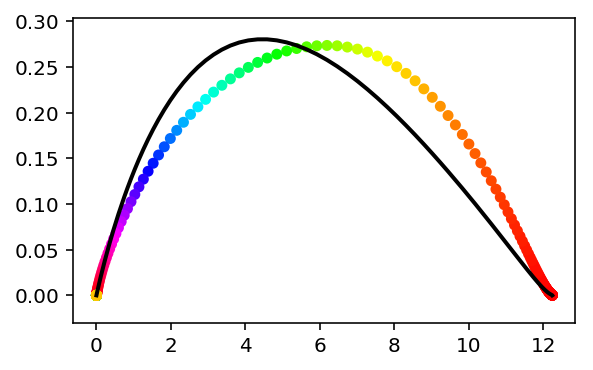

In [158]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(starch_15['Substrate_series'],starch_15['Decayrates_series'],s=20,c=starch_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(starch_15['Substrate_series'],model2(starch_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

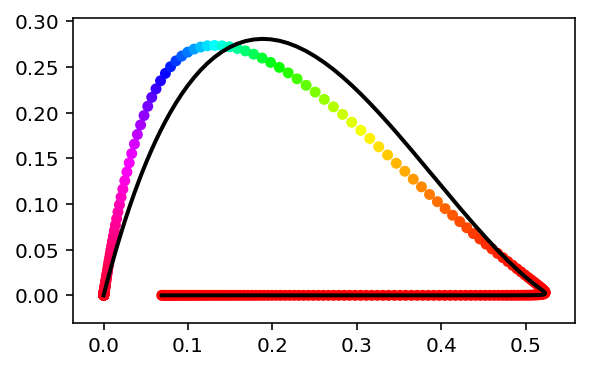

In [152]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(starch_15['Enzyme_series'],starch_15['Decayrates_series'],s=20,c=starch_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(starch_15['Enzyme_series'],model2(starch_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# Chitin

In [234]:
chitin = pd.read_csv('Chitin.csv',index_col=0)
chitin.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,5.008900,0.000000,0.000000,0.0003
1.0,5.008889,0.000004,0.000013,0.0003
2.0,5.008868,0.000008,0.000024,0.0003
3.0,5.008839,0.000011,0.000035,0.0003
4.0,5.008801,0.000014,0.000044,0.0003


In [235]:
chitin_15 = chitin[chitin['Enz_rate'] == 1.5e-04]
chitin_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,5.008900,0.000000,0.000000,0.00015
1801.0,5.008895,0.000002,0.000006,0.00015
1802.0,5.008884,0.000004,0.000012,0.00015
1803.0,5.008869,0.000006,0.000018,0.00015
1804.0,5.008849,0.000007,0.000023,0.00015


In [238]:
popt,pcov = curve_fit(model,chitin_15,chitin_15['Decayrates_series'])#,bounds=(0, [100, 150]))

In [239]:
popt

array([31.57820171, 51.79832059])

In [240]:
np.mean((chitin_15['Decayrates_series']-model(chitin_15,popt[0],popt[1]))**2)**0.5

0.0017727612178848307

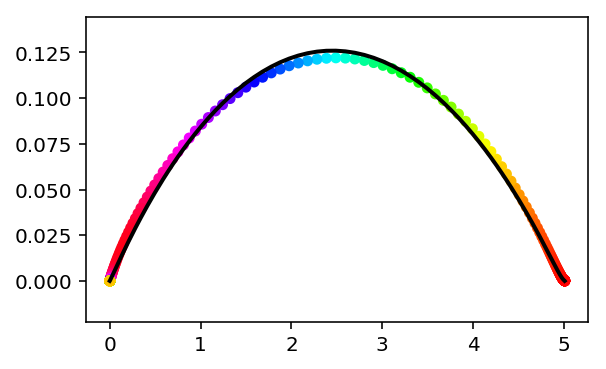

In [241]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(chitin_15['Substrate_series'],chitin_15['Decayrates_series'],s=20,c=chitin_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(chitin_15['Substrate_series'],model(chitin_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

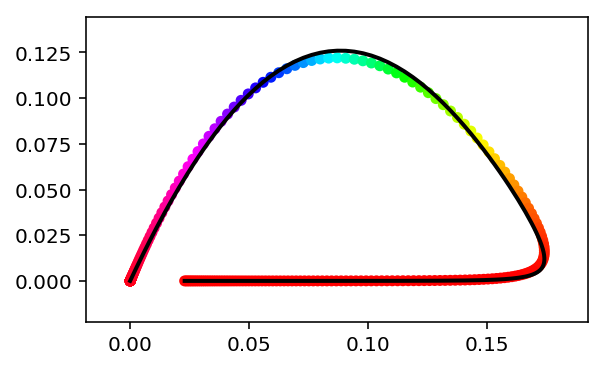

In [242]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(chitin_15['Enzyme_series'],chitin_15['Decayrates_series'],s=20,c=chitin_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(chitin_15['Enzyme_series'],model(chitin_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# Protein1

In [333]:
protein1 = pd.read_csv('Protein1.csv',index_col=0)
protein1_15 = protein1[protein1['Enz_rate'] == 1.5e-04]
protein1_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,10.629000,0.000000,0.000000,0.00015
1801.0,10.628953,0.000008,0.000056,0.00015
1802.0,10.628862,0.000015,0.000109,0.00015
1803.0,10.628731,0.000022,0.000158,0.00015
1804.0,10.628561,0.000029,0.000204,0.00015


In [334]:
popt,pcov = curve_fit(model,protein1_15,protein1_15['Decayrates_series'],bounds=(0, [100, 100]))
popt

array([ 35.20423503, 100.        ])

In [335]:
np.mean((protein1_15['Decayrates_series']-model(protein1_15,popt[0],popt[1]))**2)**0.5

0.020954623364594166

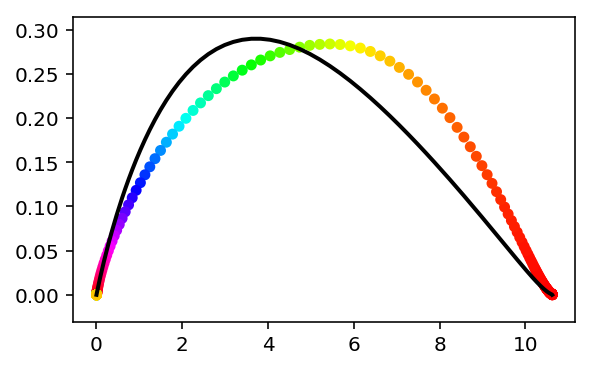

In [324]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein1_15['Substrate_series'],protein1_15['Decayrates_series'],s=20,c=protein1_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(protein1_15['Substrate_series'],model(protein1_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

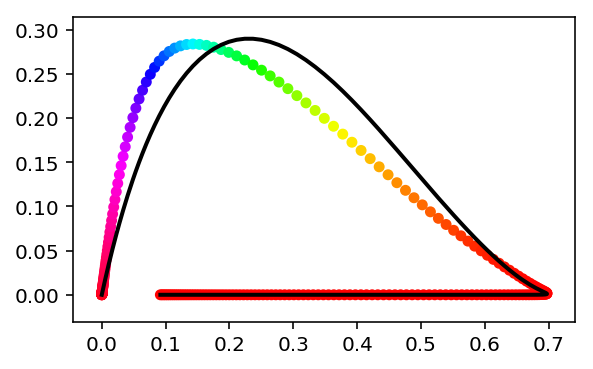

In [325]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein1_15['Enzyme_series'],protein1_15['Decayrates_series'],s=20,c=protein1_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(protein1_15['Enzyme_series'],model(protein1_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# Protein2

In [330]:
protein2 = pd.read_csv('Protein2.csv',index_col=0)
protein2_15 = protein2[protein2['Enz_rate'] == 1.5e-04]
protein2_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,10.629000,0.000000,0.000000,0.00015
1801.0,10.628915,0.000014,0.000102,0.00015
1802.0,10.628751,0.000027,0.000196,0.00015
1803.0,10.628513,0.000039,0.000285,0.00015
1804.0,10.628207,0.000050,0.000368,0.00015


In [331]:
popt,pcov = curve_fit(model,protein2_15,protein2_15['Decayrates_series'],bounds=(0, [100, 100]))
popt

array([ 26.12771972, 100.        ])

In [332]:
np.mean((protein2_15['Decayrates_series'] - model(protein2_15,popt[0],popt[1]))**2)**0.5

0.028555301863849716

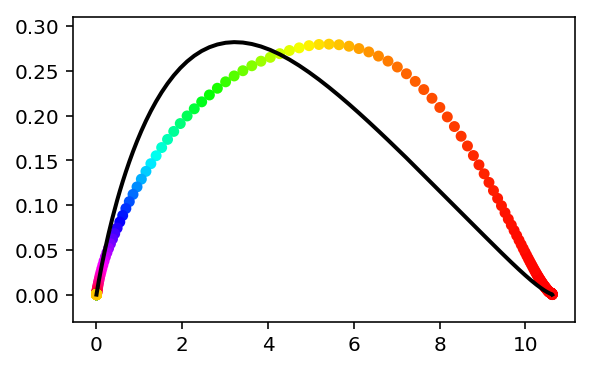

In [301]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein2_15['Substrate_series'],protein2_15['Decayrates_series'],s=20,c=protein2_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(protein2_15['Substrate_series'],model(protein2_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

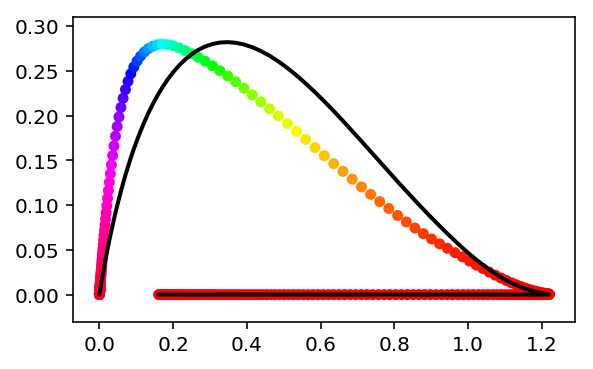

In [302]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein2_15['Enzyme_series'],protein2_15['Decayrates_series'],s=20,c=protein2_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(protein2_15['Enzyme_series'],model(protein2_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# Protein3

In [336]:
protein3 = pd.read_csv('Protein3.csv',index_col=0)
protein3_15 = protein3[protein3['Enz_rate'] == 1.5e-04]
protein3_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,10.629000,0.000000,0.000000,0.00015
1801.0,10.628977,0.000004,0.000027,0.00015
1802.0,10.628933,0.000008,0.000053,0.00015
1803.0,10.628870,0.000011,0.000076,0.00015
1804.0,10.628787,0.000014,0.000099,0.00015


In [337]:
popt,pcov = curve_fit(model,protein3_15,protein3_15['Decayrates_series'],bounds=(0, [100, 100]))
popt

array([ 48.72197012, 100.        ])

In [339]:
np.mean((protein3_15['Decayrates_series'] - model(protein3_15,popt[0],popt[1]))**2)**0.5

0.010502065068567249

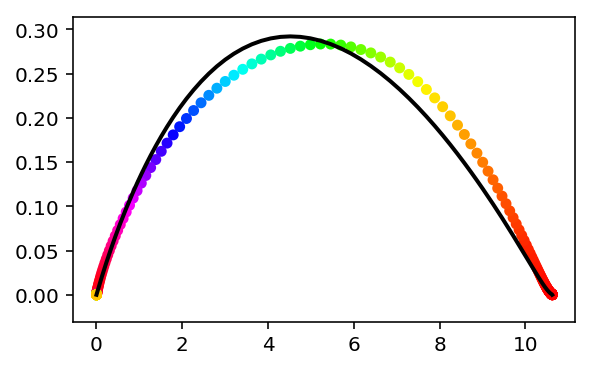

In [217]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein3_15['Substrate_series'],protein3_15['Decayrates_series'],s=20,c=protein3_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(protein3_15['Substrate_series'],model(protein3_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

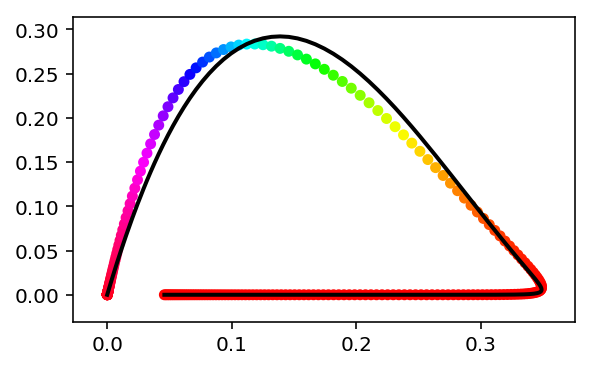

In [306]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(protein3_15['Enzyme_series'],protein3_15['Decayrates_series'],s=20,c=protein3_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(protein3_15['Enzyme_series'],model(protein3_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# OrgP1

In [311]:
OrgP1 = pd.read_csv('OrgP1.csv',index_col=0)
OrgP1_15 = OrgP1[OrgP1['Enz_rate'] == 1.5e-04]
OrgP1_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,12.514200,0.000000,0.000000,0.00015
1801.0,12.514172,0.000004,0.000029,0.00015
1802.0,12.514118,0.000008,0.000056,0.00015
1803.0,12.514039,0.000011,0.000082,0.00015
1804.0,12.513937,0.000014,0.000106,0.00015


In [312]:
popt,pcov = curve_fit(model,OrgP1_15,OrgP1_15['Decayrates_series'],bounds=(0, [100, 100]))
popt

array([ 43.33111455, 100.        ])

In [313]:
np.mean((OrgP1_15['Decayrates_series'] - model(OrgP1_15,popt[0],popt[1]))**2)**0.5

0.011770388377113687

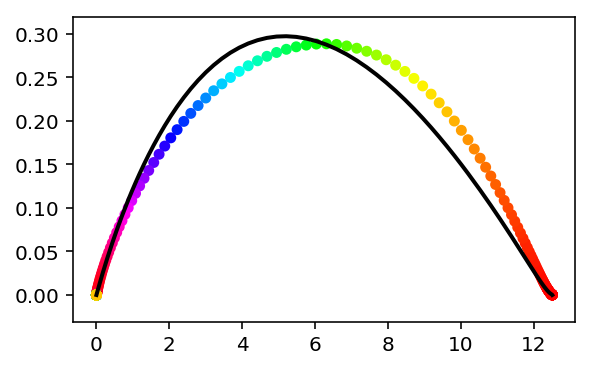

In [314]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(OrgP1_15['Substrate_series'],OrgP1_15['Decayrates_series'],s=20,c=OrgP1_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(OrgP1_15['Substrate_series'],model(OrgP1_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

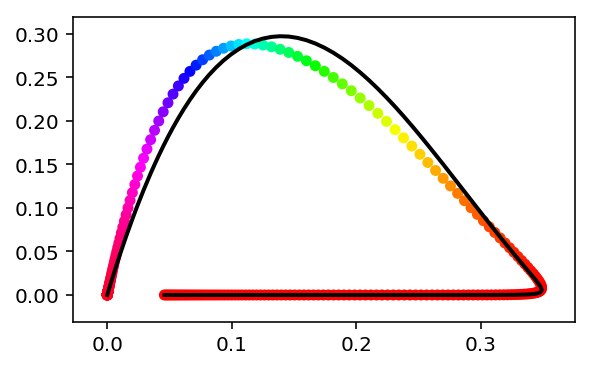

In [315]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(OrgP1_15['Enzyme_series'],OrgP1_15['Decayrates_series'],s=20,c=OrgP1_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(OrgP1_15['Enzyme_series'],model(OrgP1_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# OrgP2

In [316]:
OrgP2 = pd.read_csv('OrgP2.csv',index_col=0)
OrgP2_15 = OrgP2[OrgP2['Enz_rate'] == 1.5e-04]
OrgP2_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,1.823200,0.000000,0.000000,0.00015
1801.0,1.823195,0.000004,0.000009,0.00015
1802.0,1.823185,0.000008,0.000017,0.00015
1803.0,1.823171,0.000011,0.000024,0.00015
1804.0,1.823152,0.000014,0.000031,0.00015


In [317]:
popt,pcov = curve_fit(model,OrgP2_15,OrgP2_15['Decayrates_series'],bounds=(0, [100, 100]))
popt

array([ 73.45260914, 100.        ])

In [318]:
np.mean((OrgP2_15['Decayrates_series'] - model(OrgP2_15,popt[0],popt[1]))**2)**0.5

0.0030839333969038024

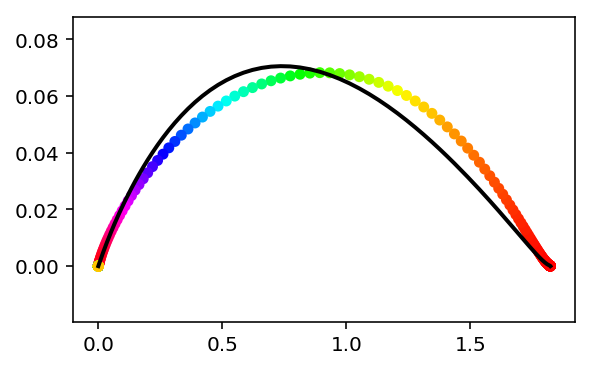

In [319]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(OrgP2_15['Substrate_series'],OrgP2_15['Decayrates_series'],s=20,c=OrgP2_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(OrgP2_15['Substrate_series'],model(OrgP2_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

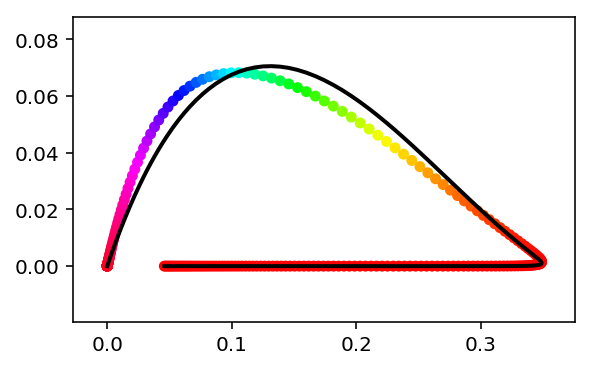

In [320]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(OrgP2_15['Enzyme_series'],OrgP2_15['Decayrates_series'],s=20,c=OrgP2_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(OrgP2_15['Enzyme_series'],model(OrgP2_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# DeadEnz

In [229]:
DeadEnz = pd.read_csv('DeadEnz.csv',index_col=0)
DeadEnz_15 = DeadEnz[DeadEnz['Enz_rate'] == 1.5e-04]
DeadEnz_15.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
1800.0,0.000000,0.000000,0.000000e+00,0.00015
1801.0,0.000002,0.000010,0.000000e+00,0.00015
1802.0,0.000007,0.000019,4.884019e-09,0.00015
1803.0,0.000014,0.000028,2.079614e-08,0.00015
1804.0,0.000022,0.000036,5.255214e-08,0.00015


In [230]:
popt,pcov = curve_fit(model,DeadEnz_15,DeadEnz_15['Decayrates_series'],bounds=(0, [200, 200]))
popt

array([10.02713538,  7.71687861])

In [231]:
np.mean((DeadEnz_15['Decayrates_series'] - model(DeadEnz_15,popt[0],popt[1]))**2)**0.5

0.0043440490693998045

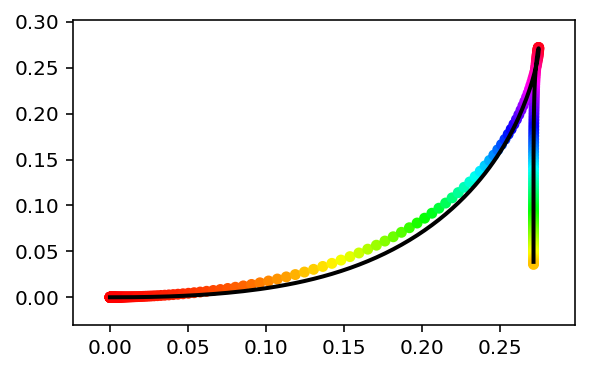

In [232]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(DeadEnz_15['Substrate_series'],DeadEnz_15['Decayrates_series'],s=20,c=DeadEnz_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(DeadEnz_15['Substrate_series'],model(DeadEnz_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

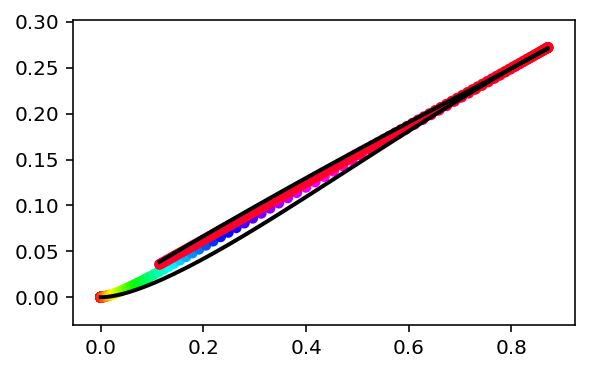

In [233]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(DeadEnz_15['Enzyme_series'],DeadEnz_15['Decayrates_series'],s=20,c=DeadEnz_15['Substrate_series'],cmap='hsv',alpha=1)
ax.plot(DeadEnz_15['Enzyme_series'],model(DeadEnz_15,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

# Total

In [259]:
def model(Xdata,Vmax,K):
    
    Rate = Vmax*Xdata['Substrate_tot']*Xdata['Enzyme_tot']/(K + Xdata['Substrate_tot'] + Xdata['Enzyme_tot'])
    
    return Rate

In [260]:
total = pd.read_csv('Total.csv',index_col=0)
#total_15 = total[total['Enz_rate'] == 1.5e-04]
total.head()

,Substrate_tot,Enzyme_tot,Rate_tot
NaN,345.502300,0.000000,0.000000
NaN,345.501911,0.000061,0.000427
NaN,345.501160,0.000119,0.000826
NaN,345.500158,0.000173,0.001199
NaN,345.498749,0.000223,0.001549


In [273]:
popt,pcov = curve_fit(model,total,total['Rate_tot']) #,bounds=(0, [200, 200]))
popt

array([  17.80617218, 1177.59888877])

In [274]:
np.mean((total['Rate_tot'] - model(total,popt[0],popt[1]))**2)**0.5

0.17785292183239984

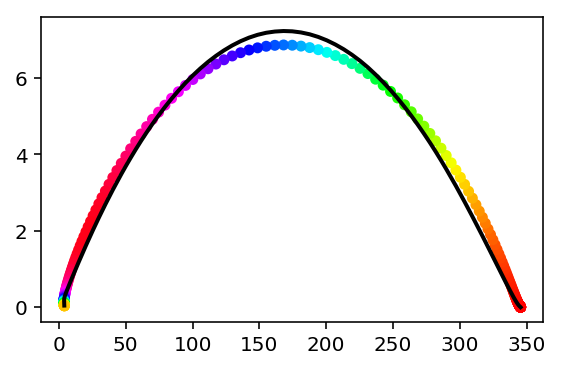

In [275]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(total['Substrate_tot'],total['Rate_tot'],s=20,c=total['Enzyme_tot'],cmap='hsv',alpha=1)
ax.plot(total['Substrate_tot'],model(total,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)

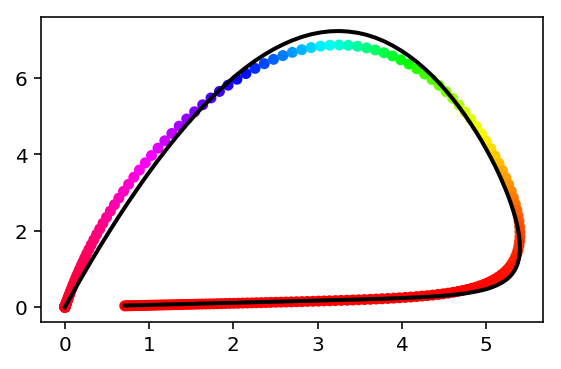

In [276]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

ax.scatter(total['Enzyme_tot'],total['Rate_tot'],s=20,c=total['Substrate_tot'],cmap='hsv',alpha=1)
ax.plot(total['Enzyme_tot'],model(total,popt[0],popt[1]),linewidth=2, color='black',alpha=1.0)